<a href="https://colab.research.google.com/github/KavishaMadani/machine-learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kavisha Madani**


### **Seat No. = 202318007**

In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
from scipy.spatial.distance import mahalanobis
from scipy.spatial.distance import cosine
from collections import Counter
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import euclidean
from scipy.stats import chi2
from scipy.linalg import inv

In [ ]:
data=pd.read_csv("Social_Network_Ads .csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Visualize the data by 3D plotting features using different colors for label 0 and 1.

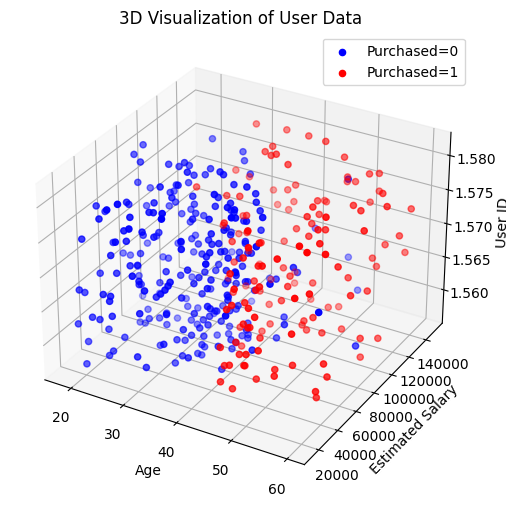

In [ ]:
label0 = data[data["Purchased"] == 0]
label1 = data[data["Purchased"] == 1]
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(label0["Age"], label0["EstimatedSalary"], label0["User ID"], c="blue", label="Purchased=0")
ax.scatter(label1["Age"], label1["EstimatedSalary"], label1["User ID"], c="red", label="Purchased=1")
ax.set_xlabel("Age")
ax.set_ylabel("Estimated Salary")
ax.set_zlabel("User ID")
ax.set_title("3D Visualization of User Data")
ax.legend()
plt.show()

Compare your kNN classifier’s implementation with the available library function. Use 90% data points
for training and the remaining 10% for testing the accuracy of classification.

In [ ]:
X = data.drop(['User ID', 'Purchased'], axis=1)
y = data['Purchased']

In [ ]:
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.925


In [ ]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [ ]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [ ]:
class MyKNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [ ]:
X = data.drop(['User ID', 'Purchased'], axis=1)
y = data['Purchased']
X= pd.get_dummies(X, columns=['Gender'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)
knn = MyKNeighborsClassifier(k=3)
knn.fit(X_train, y_train)
accuracy = knn.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.925


Using the confusion matrix find accuracy, precision, F1 score and recall for different values of k.


Metrics for k=1:
Confusion Matrix:
[[25  2]
 [ 3 10]]
Accuracy: 0.8750
Precision: 0.8333
Recall: 0.7692
F1 Score: 0.8000

Metrics for k=2:
Confusion Matrix:
[[26  1]
 [ 6  7]]
Accuracy: 0.8250
Precision: 0.8750
Recall: 0.5385
F1 Score: 0.6667

Metrics for k=3:
Confusion Matrix:
[[25  2]
 [ 1 12]]
Accuracy: 0.9250
Precision: 0.8571
Recall: 0.9231
F1 Score: 0.8889

Metrics for k=4:
Confusion Matrix:
[[25  2]
 [ 3 10]]
Accuracy: 0.8750
Precision: 0.8333
Recall: 0.7692
F1 Score: 0.8000

Metrics for k=5:
Confusion Matrix:
[[25  2]
 [ 0 13]]
Accuracy: 0.9500
Precision: 0.8667
Recall: 1.0000
F1 Score: 0.9286

Metrics for k=6:
Confusion Matrix:
[[25  2]
 [ 0 13]]
Accuracy: 0.9500
Precision: 0.8667
Recall: 1.0000
F1 Score: 0.9286

Metrics for k=7:
Confusion Matrix:
[[25  2]
 [ 0 13]]
Accuracy: 0.9500
Precision: 0.8667
Recall: 1.0000
F1 Score: 0.9286

Metrics for k=8:
Confusion Matrix:
[[25  2]
 [ 0 13]]
Accuracy: 0.9500
Precision: 0.8667
Recall: 1.0000
F1 Score: 0.9286

Metrics for k=9:
Confus

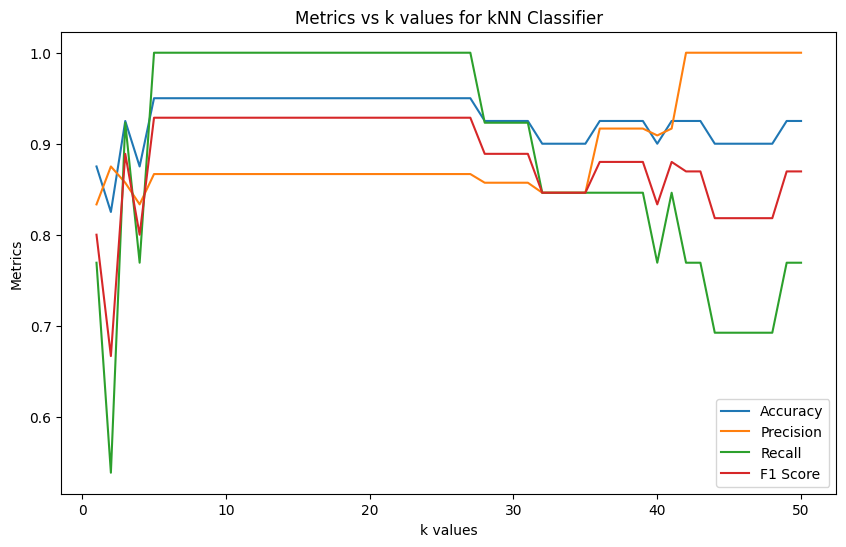

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
k_values = range(1, 51)
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\nMetrics for k={k}:")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, label='Accuracy')
plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, recall_scores, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')
plt.xlabel('k values')
plt.ylabel('Metrics')
plt.title('Metrics vs k values for kNN Classifier')
plt.legend()
plt.show()

Use the K-fold cross-validation technique (assume K = 5) and plot the average accuracy as a function
of k neighbours. Which value of k leads to the best accuracy?

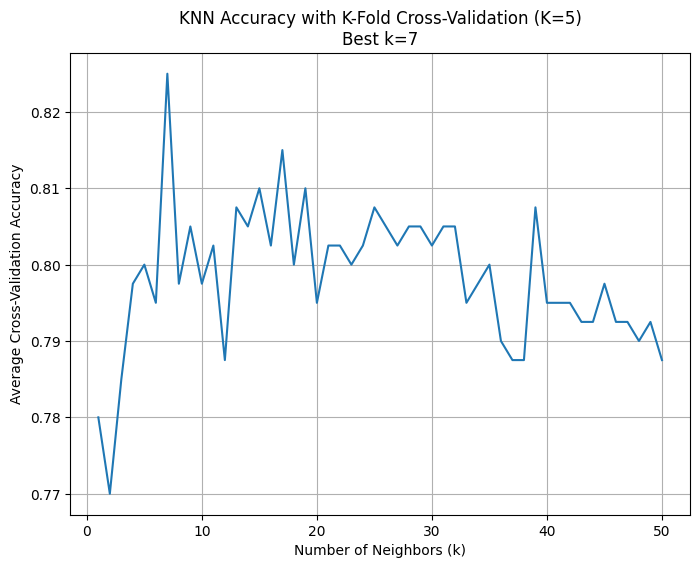

Best k value for the highest accuracy: 7


In [ ]:
k_range = range(1, 51)
k_scores = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy', n_jobs=-1)
   avg_score = np.mean(scores)
   k_scores.append(avg_score)
best_k = k_range[np.argmax(k_scores)]

plt.figure(figsize=(8, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Cross-Validation Accuracy')
plt.title(f'KNN Accuracy with K-Fold Cross-Validation (K=5)\nBest k={best_k}')
plt.grid(True)
plt.show()

print(f"Best k value for the highest accuracy: {best_k}")

Now, for the k determined above, compare your results using the following distance/similarity metrics:

Euclidean distance ,Cosine similarity, chi-square distance, Mahalanobis distance

<ipython-input-19-54af7b00afda>:14: RuntimeWarning: invalid value encountered in divide
  return np.sum((x-y)**2 / (x+y))
<ipython-input-19-54af7b00afda>:14: RuntimeWarning: invalid value encountered in divide
  return np.sum((x-y)**2 / (x+y))
<ipython-input-19-54af7b00afda>:14: RuntimeWarning: invalid value encountered in divide
  return np.sum((x-y)**2 / (x+y))
<ipython-input-19-54af7b00afda>:14: RuntimeWarning: invalid value encountered in divide
  return np.sum((x-y)**2 / (x+y))
<ipython-input-19-54af7b00afda>:14: RuntimeWarning: invalid value encountered in divide
  return np.sum((x-y)**2 / (x+y))
<ipython-input-19-54af7b00afda>:14: RuntimeWarning: invalid value encountered in divide
  return np.sum((x-y)**2 / (x+y))
<ipython-input-19-54af7b00afda>:14: RuntimeWarning: invalid value encountered in divide
  return np.sum((x-y)**2 / (x+y))
<ipython-input-19-54af7b00afda>:14: RuntimeWarning: invalid value encountered in divide
  return np.sum((x-y)**2 / (x+y))
<ipython-input-19-54af7b

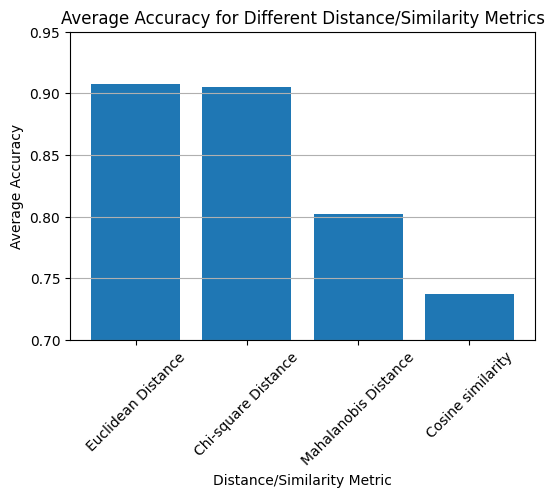

The metric that gives the best result is: Euclidean Distance


In [ ]:
from scipy.spatial.distance import euclidean
from scipy.stats import chi2
from scipy.linalg import inv
best_k = 7
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
def mahalanobis_distance(x, y, cov_inv):
    return np.sqrt(np.dot(np.dot((x - y).T, cov_inv), (x - y)))
def chi_square_distance(x, y):
    return np.sum((x-y)**2 / (x+y))
def cosine_similarity(x, y):
    dot_product = np.dot(x, y)
    magnitude_x = np.linalg.norm(x)
    magnitude_y = np.linalg.norm(y)
    similarity = dot_product / (magnitude_x * magnitude_y + 1e-10)
    distance = 1 - similarity
    return distance
cov = np.cov(X.T)
cov_inv = inv(cov)
for metric_name, metric_func in [('Euclidean Distance', euclidean),
                                 ('Chi-square Distance', chi_square_distance),
                                 ('Mahalanobis Distance', mahalanobis_distance),
                                 ('Cosine similarity',cosine_similarity)]:
    if metric_name == 'Mahalanobis Distance':
        knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric_func,metric_params = {'cov_inv':cov_inv})
    else:
        knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric_func)
    scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')
    avg_accuracy = np.mean(scores)
    results[metric_name] = avg_accuracy
plt.figure(figsize=(6, 4))
plt.bar(results.keys(), results.values())
plt.title('Average Accuracy for Different Distance/Similarity Metrics')
plt.xlabel('Distance/Similarity Metric')
plt.ylabel('Average Accuracy')
plt.ylim(0.7, 0.95)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
best_metric = max(results, key=results.get)
print(f"The metric that gives the best result is: {best_metric}")

In [ ]:
X = data.drop(['User ID', 'Purchased'], axis=1)
y = data['Purchased']
X= pd.get_dummies(X, columns=['Gender'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)
knn = MyKNeighborsClassifier(k=7)
knn.fit(X_train, y_train)
accuracy = knn.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


From the above experiments, observe the effect of extreme cases (k = 1 and large no.). Try to infer
the reason behind such results. Repeat the experiment by fixing k with reduced amount of data, (say
40% and 60%) to see whether the same k works well for different number of training samples.

In [ ]:
def evaluate_knn(X_train, X_test, y_train, y_test, k):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train, y_train)
  y_pred = knn_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

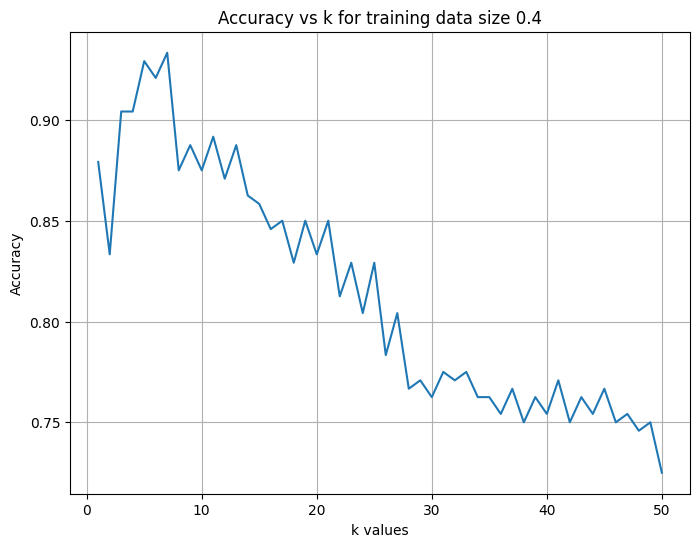

In [ ]:
X = data.drop(['User ID', 'Purchased'], axis=1)
y = data['Purchased']
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
k_values = range(1, 51)
accuracy_scores = []
for k in k_values:
  accuracy = evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test, k)
  accuracy_scores.append(accuracy)
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title(f'Accuracy vs k for training data size 0.4')
plt.grid(True)
plt.show()

In [ ]:
print("Accuracy for k=1:", accuracy_scores[0])
print("Accuracy for k=50:", accuracy_scores[-1])

Accuracy for k=1: 0.8791666666666667
Accuracy for k=50: 0.725


Effect of k: Show the decision boundaries considering two features at a time for different values of k.
Which values of k result in smoother boundaries?

<ipython-input-27-b843036dfe26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le.fit_transform(data['Gender'])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X doe

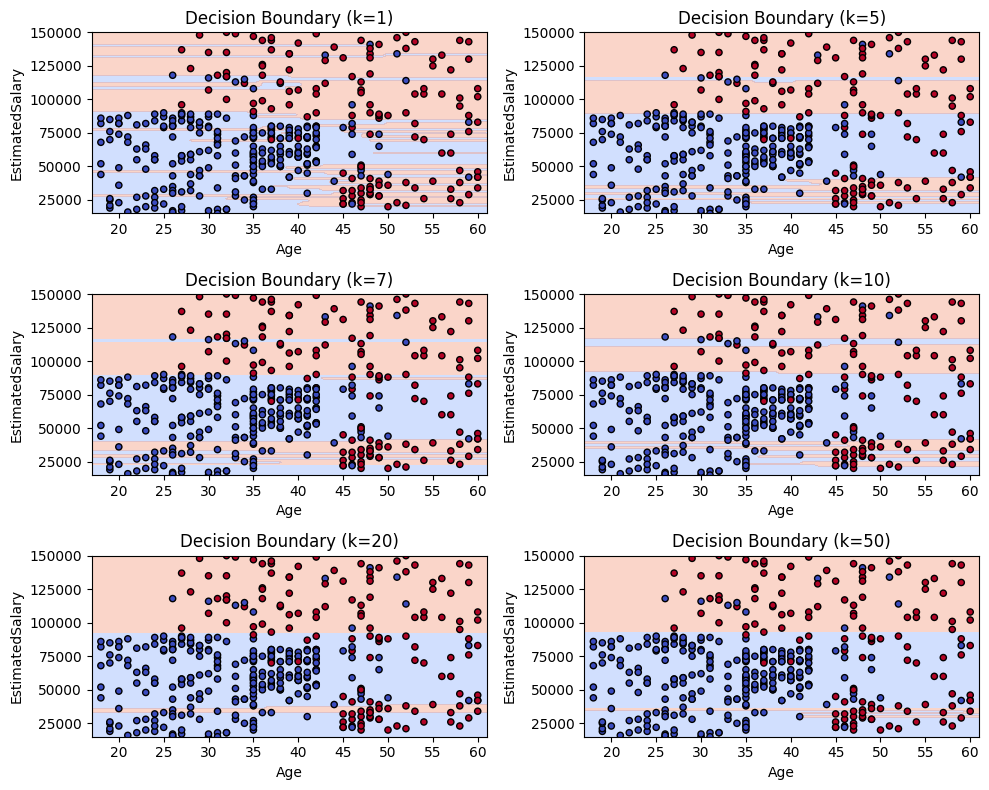

In [ ]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']
le = LabelEncoder()
X['Gender'] = le.fit_transform(data['Gender'])
k_values = [1, 5, 7, 10, 20, 50]
plt.figure(figsize=(10, 8))
feature1, feature2 = 'Age', 'EstimatedSalary'
for k in k_values:
    plt.subplot(3, 2, k_values.index(k) + 1)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X[[feature1, feature2]], y)
    x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
    y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm', levels=[0, 0.5, 1])
    plt.scatter(X[feature1], X[feature2], c=y, cmap='coolwarm', edgecolor='k', s=20)
    plt.title(f'Decision Boundary (k={k})')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
plt.tight_layout()
plt.show()

As K becomes larger, the classification decision boundary becomes smoother since several training points contribute to the classification decision.

Regression: Implement kNN for regression. Consider the first two features as the input and the third
feature as the output variable and assume 60:40 train-test split. Report the MSE for different values
of k on the test data.

In [ ]:
X = data.drop(['Age', 'Purchased','EstimatedSalary'], axis=1)
y = data['EstimatedSalary']
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

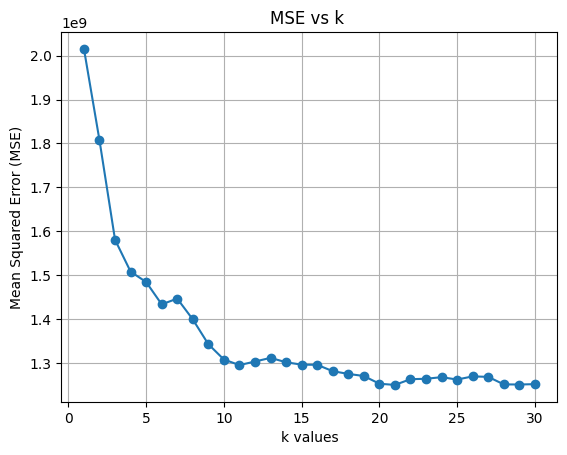

In [ ]:
k_values = range(1, 31)
mse_values = []
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    y_pred = knn_regressor.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('k values')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs k ')
plt.grid(True)
plt.show()

In [ ]:
print("MSE for k=1:", mse_values[0])
print("MSE for k=30:", mse_values[-1])

MSE for k=1: 2015168750.0
MSE for k=30: 1251944548.6111112
